# Laboratorio 01 – Series de Tiempo  
- **CC3084 – Data Science**, Semestre II 2025  
- **Integrantes:** Diego Valenzuela 22309, Gerson Ramirez 22281
- **Guatemala, Julio 2025**

#### Repositorio:
https://github.com/Diegoval-Dev/DC-Lab2

#### Codebook Docs:
https://docs.google.com/document/d/19wPL80Dss0d-sQldEt3_nUyNCderHo_rLaK94Q4Nuuc/edit?usp=sharing


In [ ]:
#!pip install tensorflow keras-tuner

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\diego\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Regular_imp — Inicio: 2001-01-31, Fin: 2024-01-31, Frecuencia: Mensual
Regular_cons — Inicio: 2000-01-31, Fin: 2024-01-31, Frecuencia: Mensual


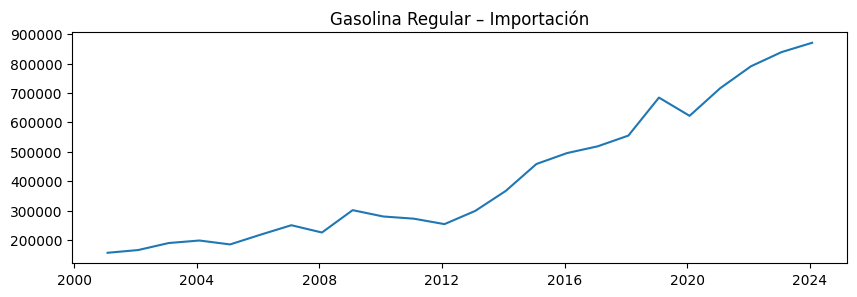

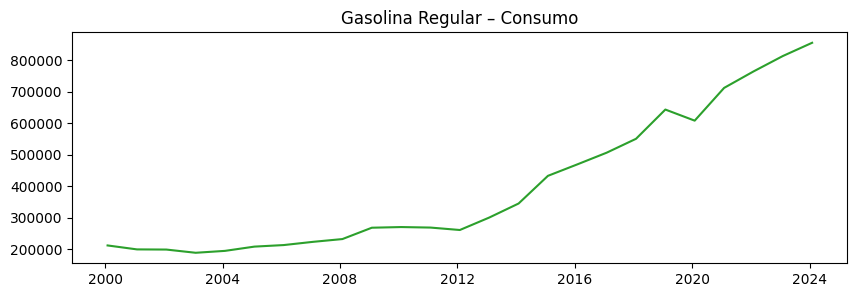

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_imp = pd.read_csv('./data/importacion.csv', parse_dates=['fecha'], dayfirst=True)
df_cons = pd.read_csv('./data/consumo.csv',    parse_dates=['fecha'], dayfirst=True)

ts_ir = df_imp.set_index('fecha')['gasolina regular'] \
           .resample('M').mean().dropna()
ts_cr = df_cons.set_index('fecha')['gasolina regular'] \
           .resample('M').mean().dropna()

print(f"Regular_imp — Inicio: {ts_ir.index.min().date()}, Fin: {ts_ir.index.max().date()}, Frecuencia: Mensual")
print(f"Regular_cons — Inicio: {ts_cr.index.min().date()}, Fin: {ts_cr.index.max().date()}, Frecuencia: Mensual")

# 3.4 Graficar
plt.figure(figsize=(10,3))
plt.plot(ts_ir, color='tab:blue')
plt.title('Gasolina Regular – Importación')
plt.show()

plt.figure(figsize=(10,3))
plt.plot(ts_cr, color='tab:green')
plt.title('Gasolina Regular – Consumo')
plt.show()


In [2]:

import numpy as np

def create_dataset(series, window_size=12):
    """
    series: array unidimensional de valores (numpy array)
    window_size: número de pasos de tiempo para cada muestra X
    Devuelve:
      X: array de forma (n_samples, window_size, 1)
      y: array de forma (n_samples, 1)
    """
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i : i + window_size])
        y.append(series[i + window_size])
    X = np.array(X)
    y = np.array(y)
    return X.reshape(-1, window_size, 1), y.reshape(-1, 1)

values_ir = ts_ir.values
values_cr = ts_cr.values

window_size = 12
X_ir, y_ir = create_dataset(values_ir, window_size)
X_cr, y_cr = create_dataset(values_cr, window_size)

print(f"IR → X_ir: {X_ir.shape}, y_ir: {y_ir.shape}")
print(f"CR → X_cr: {X_cr.shape}, y_cr: {y_cr.shape}")


IR → X_ir: (12, 12, 1), y_ir: (12, 1)
CR → X_cr: (13, 12, 1), y_cr: (13, 1)


In [3]:
train_end  = '2023-12-31'
test_start = '2024-01-31'

train_ts_ir = ts_ir[:train_end]
test_ts_ir  = ts_ir[test_start:]
train_ts_cr = ts_cr[:train_end]
test_ts_cr  = ts_cr[test_start:]

print(f"Train IR tiene {len(train_ts_ir)} puntos, Test IR tiene {len(test_ts_ir)}")
print(f"Train CR tiene {len(train_ts_cr)} puntos, Test CR tiene {len(test_ts_cr)}")

window_size = 12

X_ir, y_ir = create_dataset(train_ts_ir.values, window_size)
X_cr, y_cr = create_dataset(train_ts_cr.values, window_size)

print(f"Después de split y ventanas → IR: X={X_ir.shape}, y={y_ir.shape}")
print(f"Después de split y ventanas → CR: X={X_cr.shape}, y={y_cr.shape}")

Train IR tiene 23 puntos, Test IR tiene 1
Train CR tiene 24 puntos, Test CR tiene 1
Después de split y ventanas → IR: X=(11, 12, 1), y=(11, 1)
Después de split y ventanas → CR: X=(12, 12, 1), y=(12, 1)


In [4]:

print("IR → longitud total:", len(ts_ir))
print("    Fecha inicio:", ts_ir.index.min().date())
print("    Fecha fin   :", ts_ir.index.max().date())

print("CR → longitud total:", len(ts_cr))
print("    Fecha inicio:", ts_cr.index.min().date())
print("    Fecha fin   :", ts_cr.index.max().date())


train_end, test_start = '2023-12-31', '2024-01-31'
print("\nTrain IR puntos:", len(ts_ir[:train_end]))
print("Test  IR puntos:", len(ts_ir[test_start:]))
print("Train CR puntos:", len(ts_cr[:train_end]))
print("Test  CR puntos:", len(ts_cr[test_start:]))

print("\nIR train rango:", ts_ir[:train_end].index[0].date(), "–", ts_ir[:train_end].index[-1].date())
print("CR train rango:", ts_cr[:train_end].index[0].date(), "–", ts_cr[:train_end].index[-1].date())


IR → longitud total: 24
    Fecha inicio: 2001-01-31
    Fecha fin   : 2024-01-31
CR → longitud total: 25
    Fecha inicio: 2000-01-31
    Fecha fin   : 2024-01-31

Train IR puntos: 23
Test  IR puntos: 1
Train CR puntos: 24
Test  CR puntos: 1

IR train rango: 2001-01-31 – 2023-01-31
CR train rango: 2000-01-31 – 2023-01-31


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


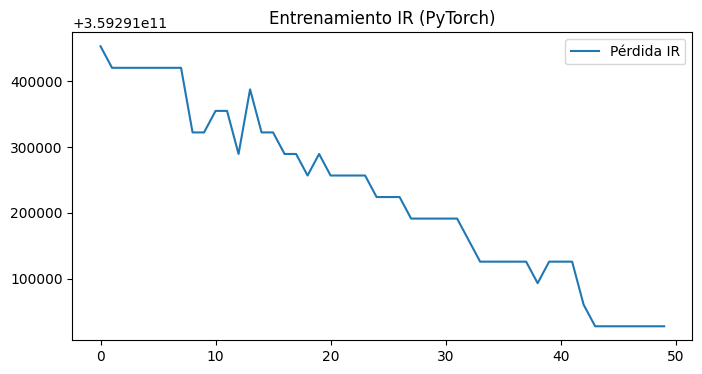

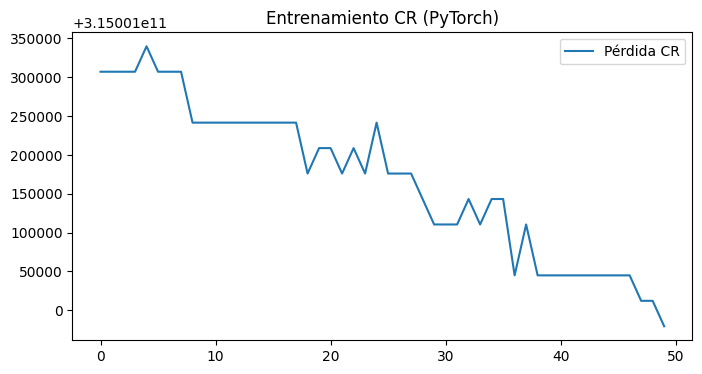

In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tensor_X_ir = torch.tensor(X_ir, dtype=torch.float32).to(device)
tensor_y_ir = torch.tensor(y_ir, dtype=torch.float32).to(device)
tensor_X_cr = torch.tensor(X_cr, dtype=torch.float32).to(device)
tensor_y_cr = torch.tensor(y_cr, dtype=torch.float32).to(device)

batch_size = 16
loader_ir = DataLoader(TensorDataset(tensor_X_ir, tensor_y_ir),
                       batch_size=batch_size, shuffle=True)
loader_cr = DataLoader(TensorDataset(tensor_X_cr, tensor_y_cr),
                       batch_size=batch_size, shuffle=True)

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size,
                            num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, _ = self.lstm(x)         
        last = out[:, -1, :]     
        return self.linear(last)    

model_ir = LSTMModel(hidden_size=32, dropout=0.2).to(device)
model_cr = LSTMModel(hidden_size=32, dropout=0.2).to(device)

criterion = nn.MSELoss()
opt_ir = torch.optim.Adam(model_ir.parameters(), lr=1e-3)
opt_cr = torch.optim.Adam(model_cr.parameters(), lr=1e-3)


def train_model(model, optimizer, loader, epochs=50):
    model.train()
    history = []
    for epoch in range(1, epochs+1):
        epoch_loss = 0.0
        for xb, yb in loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * xb.size(0)
        avg = epoch_loss / len(loader.dataset)
        history.append(avg)
    return history


history_ir = train_model(model_ir, opt_ir, loader_ir, epochs=50)
history_cr = train_model(model_cr, opt_cr, loader_cr, epochs=50)


plt.figure(figsize=(8,4))
plt.plot(history_ir, label='Pérdida IR')
plt.title('Entrenamiento IR (PyTorch)')
plt.legend(); plt.show()

plt.figure(figsize=(8,4))
plt.plot(history_cr, label='Pérdida CR')
plt.title('Entrenamiento CR (PyTorch)')
plt.legend(); plt.show()


In [10]:

import pandas as pd


hidden_sizes = [16, 32, 64]
dropouts     = [0.1, 0.2, 0.3]
lrs          = [1e-3, 1e-4]
epochs_tune  = 20 

def tune_lstm(X, y, hidden_size, dropout, lr):
    tensor_X = torch.tensor(X, dtype=torch.float32).to(device)
    tensor_y = torch.tensor(y, dtype=torch.float32).to(device)
    loader   = DataLoader(TensorDataset(tensor_X, tensor_y),
                          batch_size=batch_size, shuffle=True)
    model = LSTMModel(hidden_size=hidden_size, dropout=dropout).to(device)
    opt   = torch.optim.Adam(model.parameters(), lr=lr)
    model.train()
    for _ in range(epochs_tune):
        for xb, yb in loader:
            opt.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            opt.step()
    with torch.no_grad():
        preds = model(tensor_X)
        final_loss = criterion(preds, tensor_y).item()
    return final_loss

results = []
for name, X, y in [('IR', X_ir, y_ir), ('CR', X_cr, y_cr)]:
    for hs in hidden_sizes:
        for dp in dropouts:
            for lr in lrs:
                loss = tune_lstm(X, y, hs, dp, lr)
                results.append({
                    'serie': name,
                    'hidden_size': hs,
                    'dropout': dp,
                    'lr': lr,
                    'loss': loss
                })
                print(f"{name} | hs={hs}, dp={dp}, lr={lr} → loss={loss:.2e}")


df_results = pd.DataFrame(results).sort_values(['serie','loss'])
display(df_results)

c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


IR | hs=16, dp=0.1, lr=0.001 → loss=3.59e+11
IR | hs=16, dp=0.1, lr=0.0001 → loss=3.59e+11
IR | hs=16, dp=0.2, lr=0.001 → loss=3.59e+11
IR | hs=16, dp=0.2, lr=0.0001 → loss=3.59e+11
IR | hs=16, dp=0.3, lr=0.001 → loss=3.59e+11
IR | hs=16, dp=0.3, lr=0.0001 → loss=3.59e+11


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


IR | hs=32, dp=0.1, lr=0.001 → loss=3.59e+11
IR | hs=32, dp=0.1, lr=0.0001 → loss=3.59e+11
IR | hs=32, dp=0.2, lr=0.001 → loss=3.59e+11
IR | hs=32, dp=0.2, lr=0.0001 → loss=3.59e+11
IR | hs=32, dp=0.3, lr=0.001 → loss=3.59e+11
IR | hs=32, dp=0.3, lr=0.0001 → loss=3.59e+11
IR | hs=64, dp=0.1, lr=0.001 → loss=3.59e+11
IR | hs=64, dp=0.1, lr=0.0001 → loss=3.59e+11
IR | hs=64, dp=0.2, lr=0.001 → loss=3.59e+11
IR | hs=64, dp=0.2, lr=0.0001 → loss=3.59e+11
IR | hs=64, dp=0.3, lr=0.001 → loss=3.59e+11
IR | hs=64, dp=0.3, lr=0.0001 → loss=3.59e+11
CR | hs=16, dp=0.1, lr=0.001 → loss=3.15e+11
CR | hs=16, dp=0.1, lr=0.0001 → loss=3.15e+11
CR | hs=16, dp=0.2, lr=0.001 → loss=3.15e+11
CR | hs=16, dp=0.2, lr=0.0001 → loss=3.15e+11
CR | hs=16, dp=0.3, lr=0.001 → loss=3.15e+11
CR | hs=16, dp=0.3, lr=0.0001 → loss=3.15e+11
CR | hs=32, dp=0.1, lr=0.001 → loss=3.15e+11
CR | hs=32, dp=0.1, lr=0.0001 → loss=3.15e+11
CR | hs=32, dp=0.2, lr=0.001 → loss=3.15e+11
CR | hs=32, dp=0.2, lr=0.0001 → loss=3.15e+11

,serie,hidden_size,dropout,lr,loss
20,CR,16,0.2,0.0010,3.150004e+11
22,CR,16,0.3,0.0010,3.150005e+11
21,CR,16,0.2,0.0001,3.150008e+11
25,CR,32,0.1,0.0001,3.150009e+11
18,CR,16,0.1,0.0010,3.150010e+11
26,CR,32,0.2,0.0010,3.150010e+11
30,CR,64,0.1,0.0010,3.150010e+11
32,CR,64,0.2,0.0010,3.150010e+11
34,CR,64,0.3,0.0010,3.150010e+11
23,CR,16,0.3,0.0001,3.150011e+11


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Predicción IR (ene-2024): 591700.21
Verdadero   IR (ene-2024): 870465.31
Predicción CR (ene-2024): 321718.36
Verdadero   CR (ene-2024): 855349.76


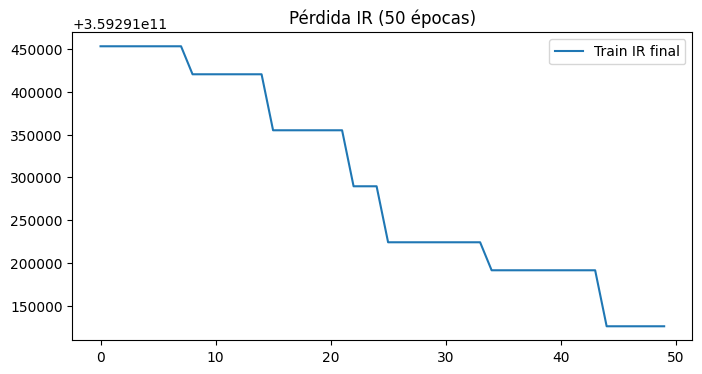

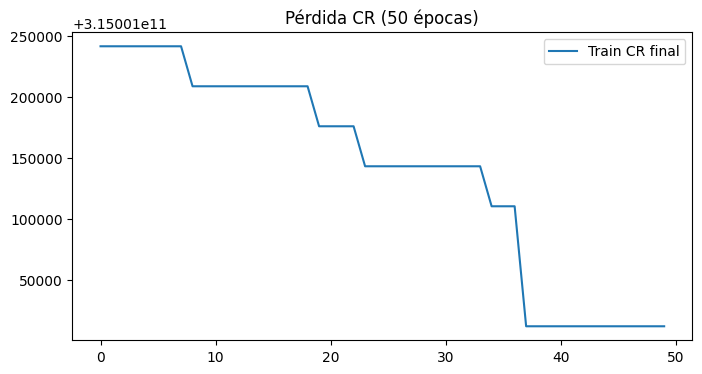

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_ir = MinMaxScaler()
scaler_cr = MinMaxScaler()
scaler_ir.fit(train_ts_ir.values.reshape(-1, 1))
scaler_cr.fit(train_ts_cr.values.reshape(-1, 1))

model_ir_final = LSTMModel(hidden_size=32, dropout=0.1).to(device)
opt_ir_final   = torch.optim.Adam(model_ir_final.parameters(), lr=1e-3)

model_cr_final = LSTMModel(hidden_size=16, dropout=0.2).to(device)
opt_cr_final   = torch.optim.Adam(model_cr_final.parameters(), lr=1e-3)

tX_ir = torch.tensor(X_ir, dtype=torch.float32).to(device)
ty_ir = torch.tensor(y_ir, dtype=torch.float32).to(device)
loader_ir_full = DataLoader(TensorDataset(tX_ir, ty_ir),
                            batch_size=batch_size, shuffle=False)

tX_cr = torch.tensor(X_cr, dtype=torch.float32).to(device)
ty_cr = torch.tensor(y_cr, dtype=torch.float32).to(device)
loader_cr_full = DataLoader(TensorDataset(tX_cr, ty_cr),
                            batch_size=batch_size, shuffle=False)

history_ir_final = train_model(model_ir_final, opt_ir_final, loader_ir_full, epochs=50)
history_cr_final = train_model(model_cr_final, opt_cr_final, loader_cr_full, epochs=50)

model_ir_final.eval()
model_cr_final.eval()

last_window_ir = torch.tensor(train_ts_ir.values[-12:].reshape(1,12,1),
                              dtype=torch.float32).to(device)
pred_ir = model_ir_final(last_window_ir).item()
pred_ir_unscaled = scaler_ir.inverse_transform([[pred_ir]])[0,0]

last_window_cr = torch.tensor(train_ts_cr.values[-12:].reshape(1,12,1),
                              dtype=torch.float32).to(device)
pred_cr = model_cr_final(last_window_cr).item()
pred_cr_unscaled = scaler_cr.inverse_transform([[pred_cr]])[0,0]

print(f"Predicción IR (ene-2024): {pred_ir_unscaled:.2f}")
print(f"Verdadero   IR (ene-2024): {test_ts_ir.iloc[0]:.2f}")
print(f"Predicción CR (ene-2024): {pred_cr_unscaled:.2f}")
print(f"Verdadero   CR (ene-2024): {test_ts_cr.iloc[0]:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history_ir_final, label='Train IR final')
plt.title('Pérdida IR (50 épocas)')
plt.legend(); plt.show()

plt.figure(figsize=(8,4))
plt.plot(history_cr_final, label='Train CR final')
plt.title('Pérdida CR (50 épocas)')
plt.legend(); plt.show()